
Training with learning rate: 0.1


C:\Users\anany\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


  Episode 10000 complete
  Episode 20000 complete
  Episode 30000 complete
  Episode 40000 complete
  Episode 50000 complete

Training with learning rate: 0.3
  Episode 10000 complete
  Episode 20000 complete
  Episode 30000 complete
  Episode 40000 complete
  Episode 50000 complete

Training with learning rate: 0.5
  Episode 10000 complete
  Episode 20000 complete
  Episode 30000 complete
  Episode 40000 complete
  Episode 50000 complete

Training with learning rate: 0.7
  Episode 10000 complete
  Episode 20000 complete
  Episode 30000 complete
  Episode 40000 complete
  Episode 50000 complete

Training with learning rate: 0.9
  Episode 10000 complete
  Episode 20000 complete
  Episode 30000 complete
  Episode 40000 complete
  Episode 50000 complete


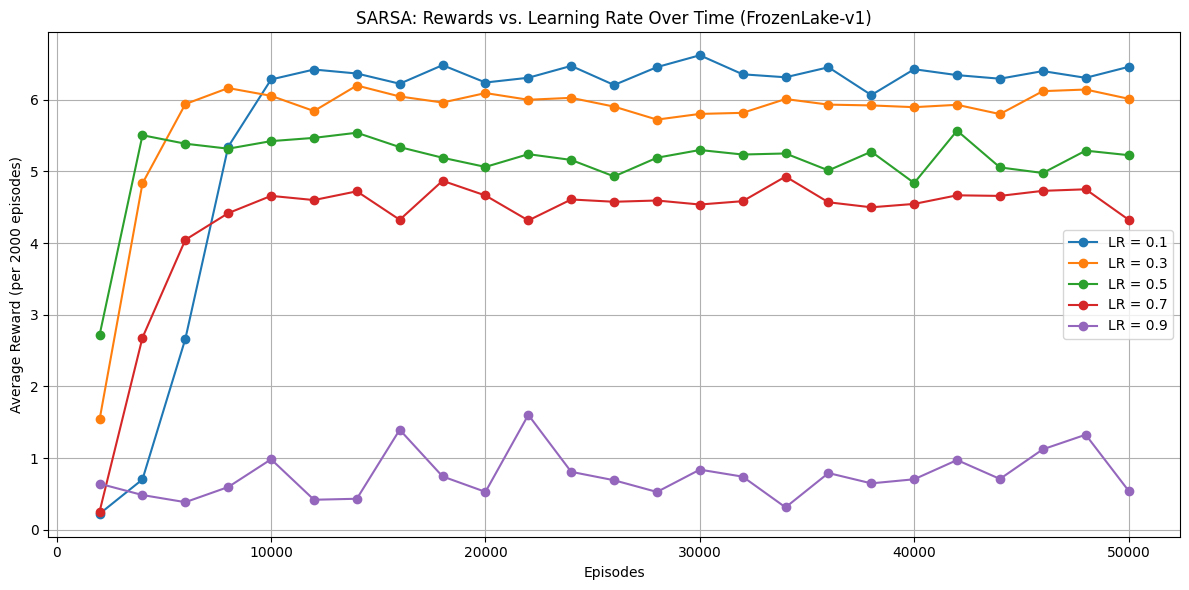

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Environment Setup
env = gym.make('FrozenLake-v1', is_slippery=True)
state_space = env.observation_space.n
action_space = env.action_space.n

# Global Parameters
episodes = 50000
group_size = 2000
num_groups = episodes // group_size
epsilon_decay_rate = 0.0005
min_epsilon = 0.01
discount_factor = 0.99
learning_rates = [0.1, 0.3, 0.5, 0.7, 0.9]

# ε-greedy policy
def epsilon_greedy_action(Q_table, state, epsilon):
    if np.random.rand() < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(Q_table[state])

# SARSA Update
def sarsa_update(Q_table, state, action, reward, next_state, next_action, lr, discount_factor):
    target = reward + discount_factor * Q_table[next_state, next_action]
    Q_table[state, action] += lr * (target - Q_table[state, action])

# Store grouped rewards for each learning rate
lr_grouped_rewards = []

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    Q_table = np.zeros((state_space, action_space))
    epsilon = 1.0
    rewards_per_episode = []

    for episode in range(episodes):
        state, _ = env.reset()
        action = epsilon_greedy_action(Q_table, state, epsilon)
        done = False
        total_reward = 0

        while not done:
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            next_action = epsilon_greedy_action(Q_table, next_state, epsilon)

            reward = -0.01 if reward == 0 else 10  # Reward shaping

            sarsa_update(Q_table, state, action, reward, next_state, next_action, lr, discount_factor)

            state = next_state
            action = next_action
            total_reward += reward

        epsilon = max(min_epsilon, epsilon * np.exp(-epsilon_decay_rate * episode))
        rewards_per_episode.append(total_reward)

        if (episode + 1) % 10000 == 0:
            print(f"  Episode {episode + 1} complete")

    # Group rewards into 2000-episode chunks
    grouped_avg = np.mean(np.array(rewards_per_episode).reshape(num_groups, group_size), axis=1)
    lr_grouped_rewards.append(grouped_avg)

# Plotting: Rewards vs Learning Rate Over Time
plt.figure(figsize=(12, 6))
x_vals = np.arange(1, num_groups + 1) * group_size

for i, lr in enumerate(learning_rates):
    plt.plot(x_vals, lr_grouped_rewards[i], marker='o', label=f"LR = {lr}")

plt.xlabel("Episodes")
plt.ylabel("Average Reward (per 2000 episodes)")
plt.title("SARSA: Rewards vs. Learning Rate Over Time (FrozenLake-v1)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [2]:
lr_grouped_rewards


[array([0.22398 , 0.703415, 2.664005, 5.344225, 6.282195, 6.420855,
        6.365375, 6.222755, 6.481965, 6.23955 , 6.306055, 6.47153 ,
        6.204905, 6.45446 , 6.619815, 6.354145, 6.31278 , 6.452325,
        6.06462 , 6.42519 , 6.3428  , 6.29273 , 6.398935, 6.305075,
        6.457905]),
 array([1.54011 , 4.832985, 5.93919 , 6.162145, 6.05395 , 5.841905,
        6.19791 , 6.045085, 5.960475, 6.0926  , 5.999075, 6.02588 ,
        5.90354 , 5.722375, 5.80162 , 5.816685, 6.0092  , 5.93135 ,
        5.920085, 5.895745, 5.92866 , 5.79937 , 6.11929 , 6.14184 ,
        6.01324 ]),
 array([2.71891 , 5.50444 , 5.38613 , 5.31666 , 5.422155, 5.46746 ,
        5.53923 , 5.33876 , 5.190195, 5.06225 , 5.24004 , 5.1599  ,
        4.929855, 5.190355, 5.298245, 5.235285, 5.24988 , 5.01361 ,
        5.27527 , 4.837985, 5.568265, 5.055585, 4.977555, 5.28949 ,
        5.226305]),
 array([0.255865, 2.680885, 4.045515, 4.417605, 4.65845 , 4.600025,
        4.722075, 4.325235, 4.868915, 4.66381 , 4.315715

In [3]:
comparative_QL = []
for i in range(5):
    comparative_QL.append(sum(lr_grouped_rewards[i])//25)
comparative_QL

[5.0, 5.0, 5.0, 4.0, 0.0]